# Intro to Supervised Machine Learning

We use machine learning to predict the values of a column of our dataset that we will not know in the future: sales, stock price, fraud,...etc.

Machine learning can be broadly classified in three main types:

* Supervised learning:

In this type of learning, we pretend to be able to predict the value of something knowing the previous values. Within this type of learning, we can find two sub-types:

    1. Classification: the column that we want to precict is **categorical**

    2. Regressiom: the column that we want to predict is **numerical**

* Unsupervised learning:

In this other type of learning, we don't have an historical record of know values. Therefore, what we do is to give the computer a "set of rules" to perform a task. In this type learning, can solve:

    1. Clustering: create groups of observations based on some sort of "similarity"

    2. Dimensionality reduction: describe the same data with less features/columns

    3. Anomaly detection: finding outliers


* Reinforcement learning:

Finally, in this type of learning we want the computer to find the best strategy to reach a goal. To do this, the computer takes the role of an "agent" interacting with an "environment" by applying some "actions" against the "environment". Then, the "agent" is rewarded according to the change made in the "environment" until the "agent" reaches the goal. In the meantime, the computer records how valuable is each possible action to reach the final goal. This type of "learning" is heavilly used in gamming as the IA. In this way, the computer will react differently to different player styles.


## Classification

Let's start with an example of supervised machine learning used for classification. To illustrate this, we're going to make use of a widely use Python library [sklearn](https://scikit-learn.org/stable/) that comes already installed in your computer thanks to Anaconda. This library includes lots of modules for different task alongside with some toy model datasets. We will illustrate some ideas using one dataset for **classification** (Iris dataset), and another for **regression** (California housing).

In the Iris dataset, every row corresponds to a plant that can belong to one of three classes: Setosa, Versicolor, and Virginica. Here we will try to predict to which class belongs the plant based on some features.

Let's get our hands on it!

#### Loading and preparing the data

In [19]:
from sklearn.datasets import load_iris, fetch_california_housing
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
iris = load_iris()
iris.keys()
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [23]:
df = pd.DataFrame(iris["data"], columns = iris["feature_names"])
df["target"] = iris["target"]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Checking for anomalies

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


#### Quick EDA

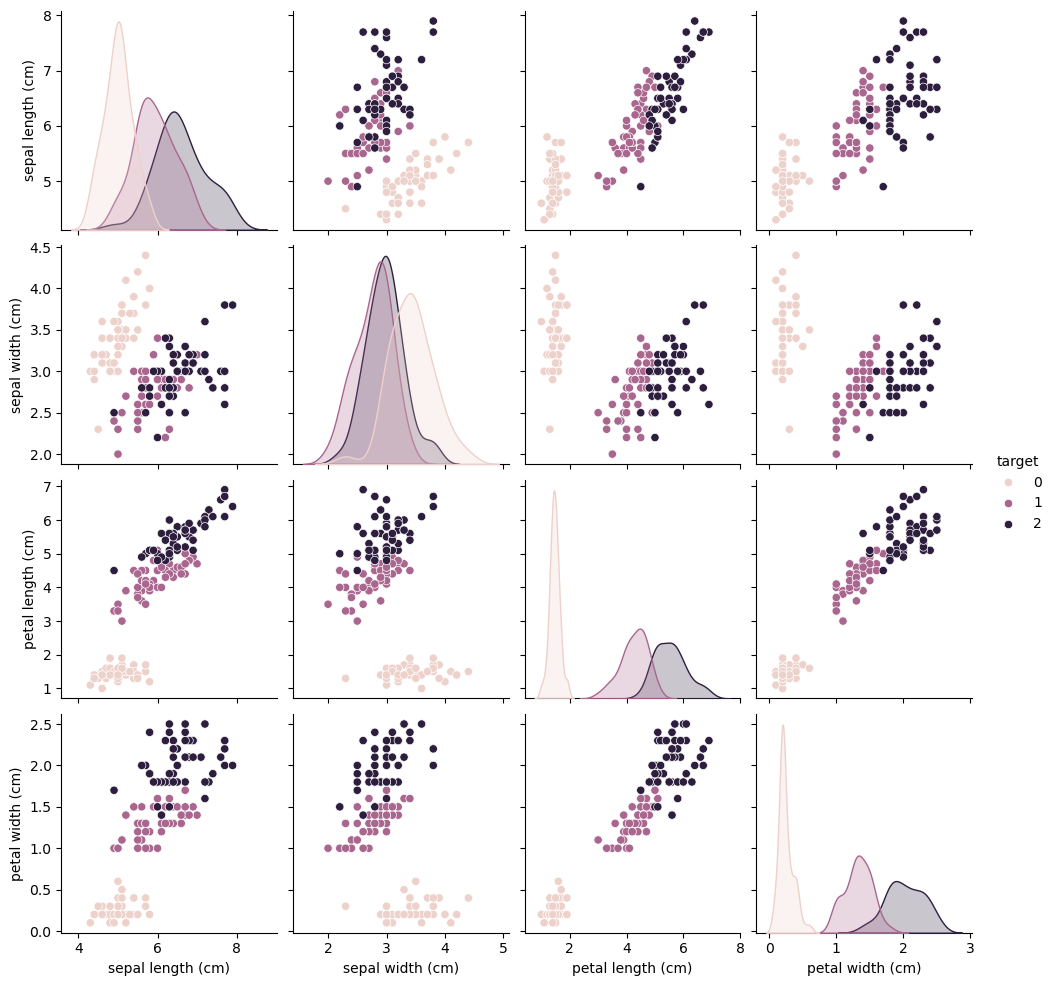

In [29]:
sns.pairplot(df, hue="target")
plt.show()

#### Train Test Split

Before training our predictive model, we need first to split our dataset in two sets: the training, and the test set (sometimes called hold-out set). As their names says, the first set is used to train our model with know values for the plant class. On other hand, the second is used to evaluate how our model performs in predicting plants that the model doesn't know. There are several reasons to do this:

1. We can't know how the model will perform in predicting new plants not seen by the model as we have used **all the plants of the dataset**. One might be tempted to evaluate the performance of the model in predicting the plants used during the training. However, this will lead to an **over estimation** of the model performance. The reason behind this, is that we trained the model to predict as accurately as possible the plants given to it, not the other plants not considered during the training.

2. As we used all the data, we can't have an idea how how good the model will perform in predicting unkown plants.

Therefore, the only way to have a **point estimation** of how the model will perform on a real scenario is to compare the predictions of the model in the test set (for which we know the class). What if we ask the model to predict another test set of plants different than the ones in our test set? Quite likely, the model's performance will not be the same:

$$score_{test_{1}} \ne score_{test_{2}}$$

then, in which score set we thrust? Well, we could evaluate the model performance in several test sets and get the mean score across all the sets (do you remember the Central Limit Theorem?). The mean of several sample means (those scores are usually the mean accuracy acros all the predictions) is always closer to the population mean ;)

3. In addition, if we evaluate the model's performace in the train, and the test sets we will be able to compare the model's performance in both sets. When we do this, we can have three possible scenarios:

$$score_{train} \gt score_{test}$$

$$score_{train} ≈ score_{test}$$

$$score_{train} \lt score_{test}$$

The first case is the most common one as we trained the model using the training set. Therefore, we can expect a better performance on the training set rather than in the tests set. However, we don't want an scenario in which the performace on the train set is way bigger than in the test set bacause this will mean that the model can only predict accurately the train set. Instead, we want a model to predict plants for which we're unsure or we don't know the class, no plants for which we know to which class the belong to!

The second case is more desirable as it might indicate that the model has been exposed to enough plants to predict accurately the class fo an unknown plant.

Finally, the last case is quite uncommon and it could mean that our features are really useful to predict to which class the plant belongs to.



First we need to distinguish from features and target

In [34]:
features = df.drop(columns = ["target"])
target = df["target"]

Now we perform the division between Train and Test, we will reserve 20% of our data to Test.

In [37]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [39]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


In [41]:
y_train.head()

137    2
84     1
27     0
127    2
132    2
Name: target, dtype: int64

For this dataset we will use KNN Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

Creating an instance of the model, for now, we will use n_neighbors=3 (we will see how to optimize this hyperparameter later)

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)

Training the model

In [50]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Now, our model is already trained, we can make predictions for new data points

In [13]:
pred = knn.predict(X_test)
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

Let's compare with the true labels

In [14]:
y_test.values

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

It seems that our model was able to correctly predict the great majority of data points. To be precise, 29 out of 30 data points were correctly labeled.

In order to evaluate our model, we will use the method "score" that will give us accuracy.

In [16]:
print(f"The accuracy of the model is {knn.score(X_test, y_test)*100: .2f}%")

The accuracy of the model is  96.67%


## Regression

In this kind of problems, we're trying to predict a **numerical column**.

#### Loading and preparing the data

In [12]:
california = fetch_california_housing()
print(california["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [14]:
df_cali = pd.DataFrame(california["data"], columns = california["feature_names"])
df_cali["median_house_value"] = california["target"]

df_cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Checking for anomalies

In [19]:
df_cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Quick EDA

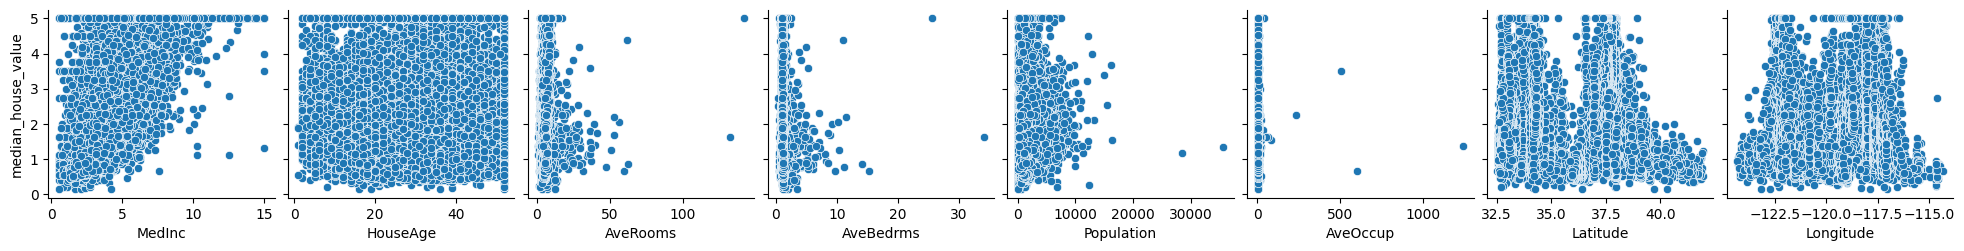

In [21]:
sns.pairplot(df_cali, y_vars=['median_house_value'], x_vars=df_cali.columns[:-1], kind='scatter');

#### Train Test Split

First we need to distinguish from features and target

In [22]:
features = df_cali.drop(columns = ["median_house_value"])
target = df_cali["median_house_value"]

Now we perform the division between Train and Test, we will reserve 20% of our data to Test.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [24]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12069,4.2386,6.0,7.723077,1.169231,228.0,3.507692,33.83,-117.55
15925,4.3898,52.0,5.326622,1.100671,1485.0,3.322148,37.73,-122.44
11162,3.9333,26.0,4.668478,1.046196,1022.0,2.777174,33.83,-118.00
4904,1.4653,38.0,3.383495,1.009709,749.0,3.635922,34.01,-118.26
4683,3.1765,52.0,4.119792,1.043403,1135.0,1.970486,34.08,-118.36


In [25]:
y_train.head()

12069    5.00001
15925    2.70000
11162    1.96100
4904     1.18800
4683     2.25000
Name: median_house_value, dtype: float64

Now, we will use KNN Regressor, we will use hyperparameter n_neighbors = 10.

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
knn = KNeighborsRegressor(n_neighbors=10)

In [28]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

We are going to evaluate our model performance with R-Squared

In [30]:
print(f"The R2 of the model is {knn.score(X_test, y_test): .2f}")

The R2 of the model is  0.16


Pretty bad model, remember, we want R2 as high as possible!

KNN is a distance base model, features having different scales are having an impact on the model's performance.